# Чтение данных

In [1]:
from Dataset import Dataset

In [2]:
data = Dataset()

# Задачи 1-2

В данных задачах неизвестно стандартное отклонение генеральной совокупности, а также выборка имеет относительно небольшой размер. Так что решено использовать t-test.

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import ttest_1samp

In [4]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2.0, n - 1)
    return m, m - h, m + h

def task12(data: np.array, popmean: float):
    print("пункт 1:")
    pvalue = ttest_1samp(a=data, popmean=popmean, alternative="less").pvalue

    if pvalue > 0.05:
        print("нулевая гипотеза принимается")
    else:
        print("нулевая гипотеза отвергается")

    print("\nпункт 2:")
    _, axs = plt.subplots(3, 1, figsize=(9, 16))

    axs[0].hist(data)
    axs[0].set_title("гистограмма")
    axs[0].set_ylabel("количество")

    axs[1].boxplot(data)
    axs[1].set_title("ящичковая диаграмма")

    sm.qqplot(data=data, fit=True, ax=axs[2])
    axs[2].set_title("график квантилей")

    plt.show()

    print("\nпункт 3:")
    print("медиана: " + str(np.median(data)))
    print("среднее: " + str(np.mean(data)))
    print("межквартиль: " + str(float(np.quantile(data, 0.75) - np.quantile(data, 0.25))))

    print("\nпункт 4:")
    print(mean_confidence_interval(data))

пункт 1:
нулевая гипотеза принимается

пункт 2:


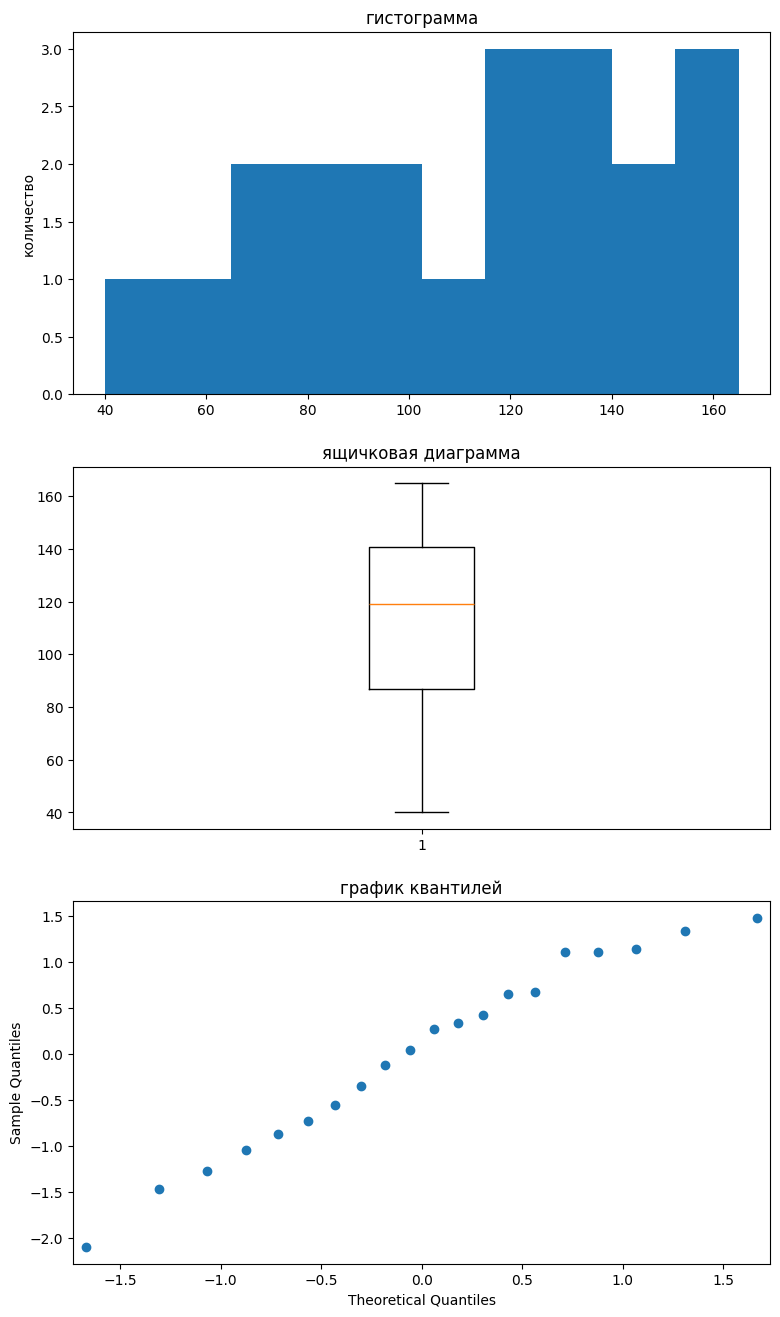


пункт 3:
медиана: 119.0
среднее: 113.45
межквартиль: 54.0

пункт 4:
(np.float64(113.45), np.float64(96.69997358801851), np.float64(130.2000264119815))


In [5]:
task12(np.array(data.rat["rat"]), popmean=100)

пункт 1:
нулевая гипотеза отвергается

пункт 2:


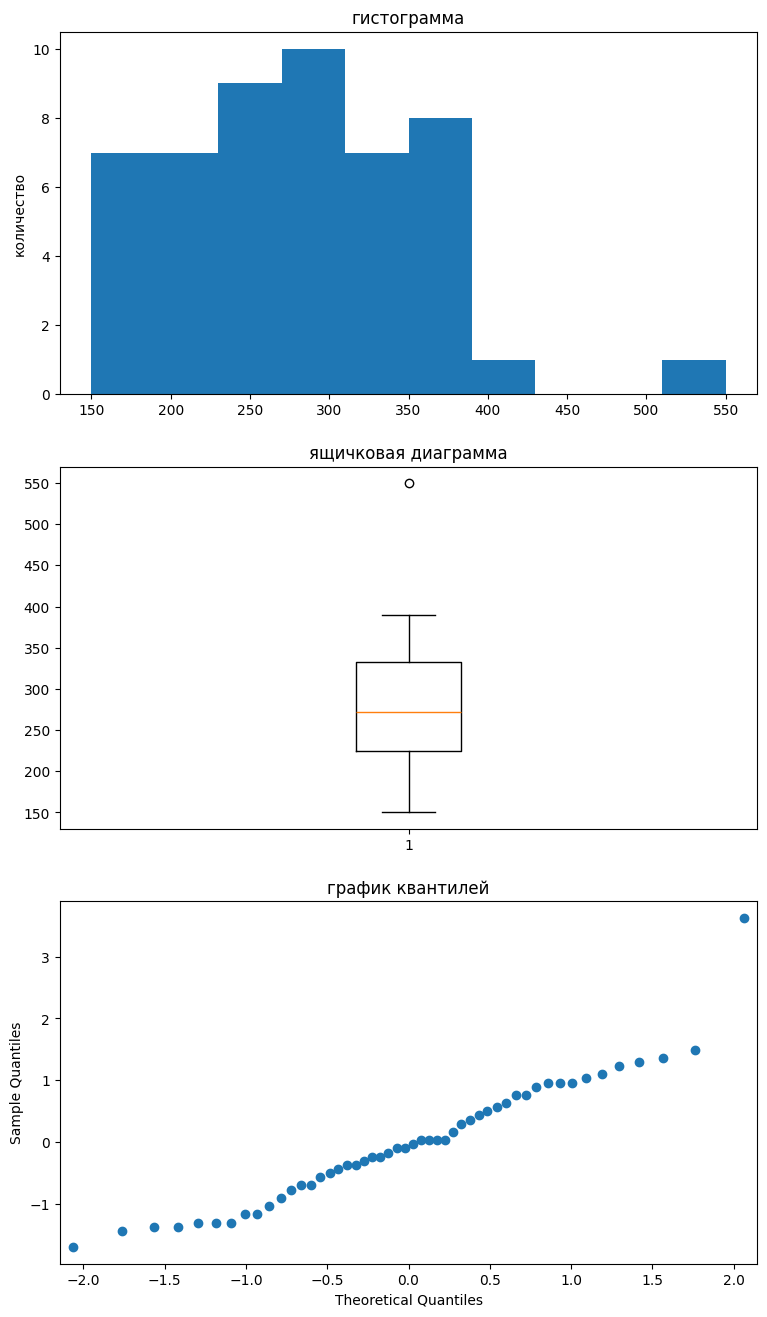


пункт 3:
медиана: 272.5
среднее: 277.5
межквартиль: 107.5

пункт 4:
(np.float64(277.5), np.float64(255.924384893863), np.float64(299.07561510613704))


In [6]:
# для пункта 1 заменим 100 на 300
task12(np.array(data.puerto["puerto"]), popmean=300)

# Задачи 3, 4

В данных задачах неизвестно стандартное отклонение генеральной совокупности, а также выборка имеет относительно небольшой размер. Так что решено использовать t-test.

In [7]:
def task34(data, popmean):
    pvalue = ttest_1samp(a=data, popmean=popmean, alternative="less").pvalue

    if pvalue > 0.05:
        print(f"нулевая гипотеза принимается, pvalue = {pvalue}")
    else:
        print(f"нулевая гипотеза отвергается, pvalue = {pvalue}")

In [8]:
task34(data=data.vacation, popmean=24)

нулевая гипотеза отвергается, pvalue = [0.0152239]


In [9]:
task34(data=data.smokyph["waterph"], popmean=7)

нулевая гипотеза принимается, pvalue = 0.9962737533464688


# Задача 5

Попробуем как Пирсона (на случай линейной зависимости), так и Спирмена (на случай нелинейной). Данные выглядят равномерно распределенными, так что больше должен подходить Пирсон.

In [16]:
def corr(a, b, type: str):
    result = st.pearsonr(a, b) if type == "pearson" else st.spearmanr(a, b)
    if result.pvalue > 0.05:
        print("нулевая гипотеза принимается, зависимости нет")
    else:
        print("нулевая гипотеза отвергается, зависимость есть")
    print(result.statistic)

In [17]:
corr(data.smokyph["elev"], data.smokyph["waterph"], "pearson")
corr(data.smokyph["elev"], data.smokyph["waterph"], "spearman")

нулевая гипотеза отвергается, зависимость есть
-0.44125873239739843
нулевая гипотеза отвергается, зависимость есть
-0.3895645542891806


отрицательная корреляция, то есть прт возрастании ондной величины, убывает другая

 r